In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [2]:
crimedata=pd.read_csv('crime_data.csv',index_col='States')
crimedata

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [3]:
crimedata.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
crimedata.shape

(50, 4)

In [5]:
crimedata.duplicated()

States
Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina    False
South Dakota      False
Tennessee

In [6]:
crimedata[crimedata.duplicated()]

,Murder,Assault,UrbanPop,Rape
States,,,,


In [7]:
crimedata.isnull()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,False,False,False,False
Alaska,False,False,False,False
Arizona,False,False,False,False
Arkansas,False,False,False,False
California,False,False,False,False
Colorado,False,False,False,False
Connecticut,False,False,False,False
Delaware,False,False,False,False
Florida,False,False,False,False


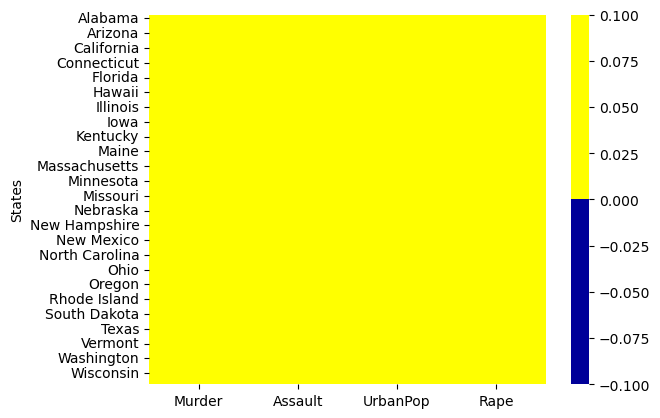

In [8]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(crimedata.isnull(), cmap=pal)
plt.show()

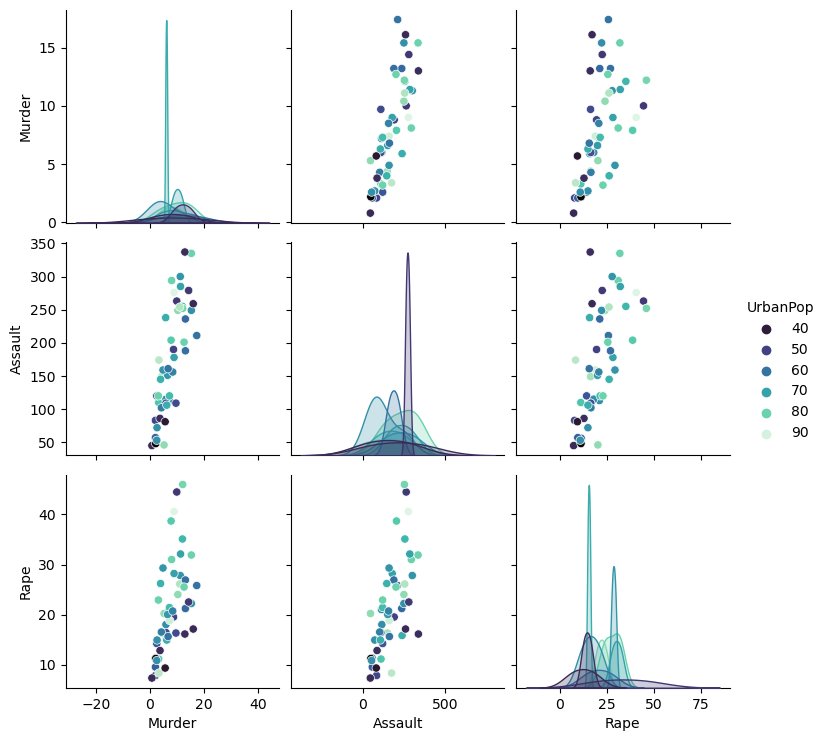

In [9]:
sns.pairplot(crimedata,palette='mako', hue='UrbanPop')
plt.show()

In [10]:
crimedata.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


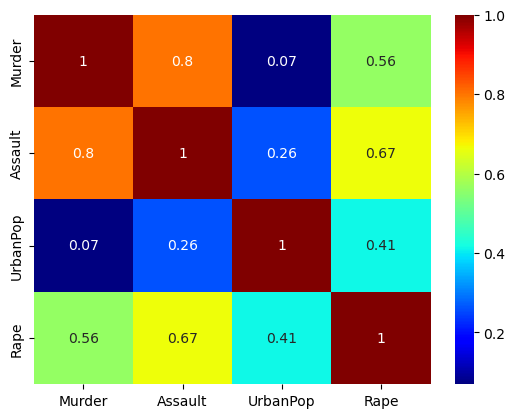

In [11]:
sns.heatmap(crimedata.corr(),cmap='jet',annot=True)
plt.show()

In [12]:
crimedata.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


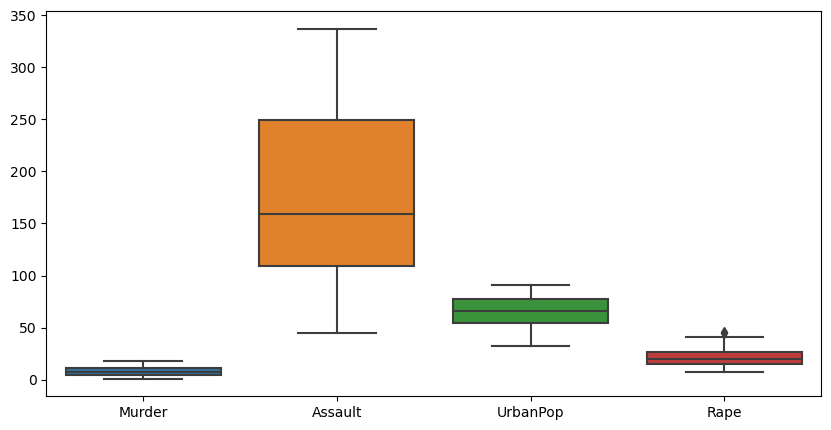

In [13]:
plt.figure(figsize=(10,5))
boxplot=sns.boxplot(data=crimedata)
plt.show()

# K-means Clustering

### Scaling the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sdscaler=StandardScaler()

In [16]:
scaled_crimedata=sdscaler.fit_transform(crimedata)
#scaled_crimedata

### Build the model

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmodel=KMeans(n_clusters=4,random_state=42)

In [19]:
kmodel.fit(scaled_crimedata)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [20]:
kmodel.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

### Hyperparameter Tuning

In [21]:
wcss_cd=[]
for i in range(1,12):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(crimedata)
    wcss_cd.append(model.inertia_)
wcss_cd

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[355807.8216,
 96399.02814449917,
 47964.26535714285,
 34728.629357142854,
 24499.388190476187,
 18875.464222222225,
 15463.47377777778,
 13329.361976190477,
 12322.914999999999,
 10468.535476190476,
 8983.499642857145]

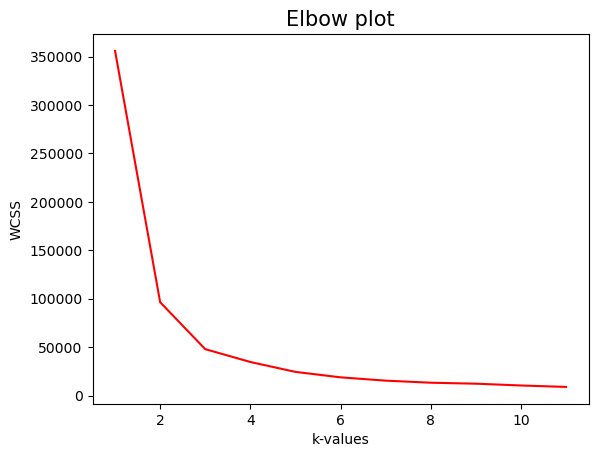

In [22]:
plt.plot(range(1,12),wcss_cd,color='red')
plt.title('Elbow plot',fontsize=15)
plt.xlabel('k-values')
plt.ylabel('WCSS')
plt.show()

### Build the final model K=3

In [23]:
fin_cdmodel=KMeans(n_clusters=3,random_state=42)

In [24]:
fin_cdmodel.fit(scaled_crimedata)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [25]:
fin_cdmodel.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [26]:
crimedata['Label']=fin_cdmodel.labels_
crimedata.head()

,Murder,Assault,UrbanPop,Rape,Label
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [27]:
crimegrp=crimedata.groupby('Label')

In [28]:
for x,y in crimegrp:
    print(x)

0
1
2


In [29]:
for x,y in crimegrp:
    print(y)
    print(55*'-')

               Murder  Assault  UrbanPop  Rape  Label
States                                               
Connecticut       3.3      110        77  11.1      0
Delaware          5.9      238        72  15.8      0
Hawaii            5.3       46        83  20.2      0
Indiana           7.2      113        65  21.0      0
Kansas            6.0      115        66  18.0      0
Massachusetts     4.4      149        85  16.3      0
New Jersey        7.4      159        89  18.8      0
Ohio              7.3      120        75  21.4      0
Oklahoma          6.6      151        68  20.0      0
Oregon            4.9      159        67  29.3      0
Pennsylvania      6.3      106        72  14.9      0
Rhode Island      3.4      174        87   8.3      0
Utah              3.2      120        80  22.9      0
Virginia          8.5      156        63  20.7      0
Washington        4.0      145        73  26.2      0
Wyoming           6.8      161        60  15.6      0
----------------------------

In [30]:
crimegrp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Label,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


In [31]:
X=crimedata.iloc[:,:4]
y=crimedata.iloc[:,4]

In [32]:
from sklearn.manifold import TSNE

In [33]:
model=TSNE(n_components=2)

In [34]:
tsne_comps=model.fit_transform(X)

In [35]:
tsne_comps

array([[-10.520209 ,  -1.3808776],
       [ -9.979379 ,  -1.1804023],
       [ -9.593576 ,  -1.5788513],
       [-11.568378 ,  -1.540311 ],
       [ -9.780599 ,  -1.7470137],
       [-11.17721  ,  -1.5432445],
       [-13.62905  ,  -1.3080819],
       [-10.498233 ,  -1.4813317],
       [ -9.260766 ,  -1.4852353],
       [-11.029801 ,  -1.4956124],
       [-14.714696 ,  -1.2499871],
       [-13.433671 ,  -1.8402579],
       [-10.259048 ,  -1.6484213],
       [-13.544032 ,  -1.6359591],
       [-14.641036 ,  -1.5665367],
       [-13.494731 ,  -1.6247188],
       [-13.713001 ,  -1.8672501],
       [-10.284583 ,  -1.3771162],
       [-14.24183  ,  -1.7960446],
       [ -9.541572 ,  -1.4176518],
       [-12.672898 ,  -1.4177487],
       [-10.153142 ,  -1.5786769],
       [-14.354678 ,  -1.3669872],
       [-10.084381 ,  -1.1350996],
       [-11.863711 ,  -1.5518165],
       [-13.718254 ,  -1.8390805],
       [-13.857857 ,  -1.4747763],
       [-10.166861 ,  -1.7398434],
       [-14.630253 ,

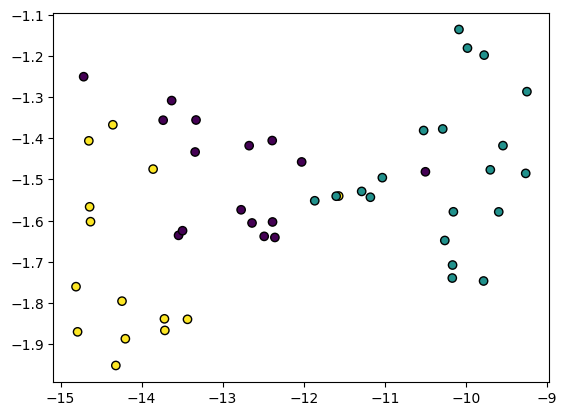

In [36]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolors='k')
plt.show()

### Hierarchical Agglomerative Clustering

1.Scaling the data

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
cd_scaler=MinMaxScaler()

In [39]:
scaler_cd=cd_scaler.fit_transform(crimedata)

### Build the model

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
cdhac_model=AgglomerativeClustering(n_clusters=3,affinity='manhattan',linkage='complete')

In [42]:
cdhac_model.fit(scaler_cd)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=3)

In [43]:
cdhac_model.labels_

array([0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [44]:
crimedata.drop('Label',axis=1,inplace=True)

In [45]:
crimedata['Agglo_Label']=cdhac_model.labels_
crimedata.head()

,Murder,Assault,UrbanPop,Rape,Agglo_Label
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0


In [46]:
y1=crimedata.iloc[:,4]
y1

States
Alabama           0
Alaska            0
Arizona           0
Arkansas          1
California        0
Colorado          0
Connecticut       2
Delaware          2
Florida           0
Georgia           0
Hawaii            2
Idaho             1
Illinois          0
Indiana           2
Iowa              1
Kansas            2
Kentucky          1
Louisiana         0
Maine             1
Maryland          0
Massachusetts     2
Michigan          0
Minnesota         1
Mississippi       0
Missouri          0
Montana           1
Nebraska          1
Nevada            0
New Hampshire     1
New Jersey        2
New Mexico        0
New York          0
North Carolina    0
North Dakota      1
Ohio              2
Oklahoma          2
Oregon            2
Pennsylvania      2
Rhode Island      2
South Carolina    0
South Dakota      1
Tennessee         0
Texas             0
Utah              2
Vermont           1
Virginia          2
Washington        2
West Virginia     1
Wisconsin         1
Wyoming      

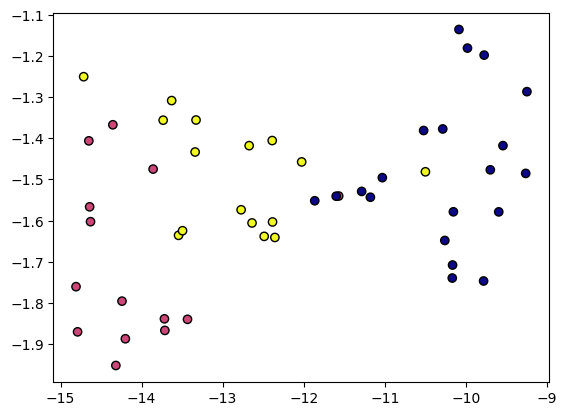

In [47]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y1,cmap='plasma',edgecolor='k')
plt.show()

In [48]:
Agglo_grp=crimedata.groupby('Agglo_Label')

In [49]:
for x,y in Agglo_grp:
    print(y)
    print(55*'-')

                Murder  Assault  UrbanPop  Rape  Agglo_Label
States                                                      
Alabama           13.2      236        58  21.2            0
Alaska            10.0      263        48  44.5            0
Arizona            8.1      294        80  31.0            0
California         9.0      276        91  40.6            0
Colorado           7.9      204        78  38.7            0
Florida           15.4      335        80  31.9            0
Georgia           17.4      211        60  25.8            0
Illinois          10.4      249        83  24.0            0
Louisiana         15.4      249        66  22.2            0
Maryland          11.3      300        67  27.8            0
Michigan          12.1      255        74  35.1            0
Mississippi       16.1      259        44  17.1            0
Missouri           9.0      178        70  28.2            0
Nevada            12.2      252        81  46.0            0
New Mexico        11.4  

In [50]:
Agglo_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
Agglo_Label,,,,
0,12.165000,255.250,68.400000,29.16500
1,3.971429,86.500,51.928571,12.70000
2,5.656250,138.875,73.875000,18.78125


In [51]:
from scipy.cluster import hierarchy

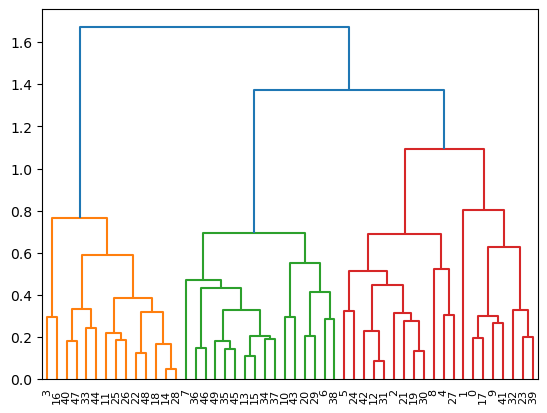

<Figure size 2000x1600 with 0 Axes>

In [52]:
hir=hierarchy.linkage(scaler_cd,method='complete')
den=hierarchy.dendrogram(hir)
plt.figure(figsize=(20,16))
plt.show()

In [53]:
y=crimedata.iloc[:,4]

### By DBSCAN Method

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
DB_model=DBSCAN(eps=0.5,min_samples=5)

In [56]:
DB_model.fit(scaler_cd)

DBSCAN()

In [57]:
DB_model.labels_

array([ 0, -1,  0,  1,  0,  0,  2,  2,  0,  0,  2,  1,  0,  2,  1,  2,  1,
        0,  1,  0,  2,  0,  1,  0,  0,  1,  1,  0,  1,  2,  0,  0,  0,  1,
        2,  2,  2,  2,  2,  0,  1,  0,  0,  2,  1,  2,  2,  1,  1,  2],
      dtype=int64)

In [58]:
crimedata.drop('Agglo_Label',axis=1,inplace=True)

In [59]:
crimedata['DBSCAN_Label']=DB_model.labels_
crimedata

,Murder,Assault,UrbanPop,Rape,DBSCAN_Label
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,0


In [60]:
y2=crimedata.iloc[:,4]

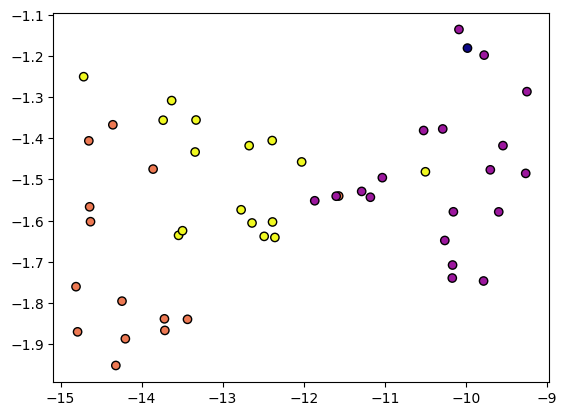

In [61]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y2,cmap='plasma',edgecolor='k')
plt.show()

In [62]:
DBgroup=crimedata.groupby('DBSCAN_Label')

In [63]:
for x,y in DBgroup:
    print(x)

-1
0
1
2


In [64]:
for x,y in DBgroup:
    print(y)
    print(55*'-')

        Murder  Assault  UrbanPop  Rape  DBSCAN_Label
States                                               
Alaska    10.0      263        48  44.5            -1
-------------------------------------------------------
                Murder  Assault  UrbanPop  Rape  DBSCAN_Label
States                                                       
Alabama           13.2      236        58  21.2             0
Arizona            8.1      294        80  31.0             0
California         9.0      276        91  40.6             0
Colorado           7.9      204        78  38.7             0
Florida           15.4      335        80  31.9             0
Georgia           17.4      211        60  25.8             0
Illinois          10.4      249        83  24.0             0
Louisiana         15.4      249        66  22.2             0
Maryland          11.3      300        67  27.8             0
Michigan          12.1      255        74  35.1             0
Mississippi       16.1      259       

## Comparing the three results

In [65]:
crimedata['HAC_Label']=cdhac_model.labels_

In [66]:
crimedata['KMeans_Label']=fin_cdmodel.labels_

In [67]:
crimedata

,Murder,Assault,UrbanPop,Rape,DBSCAN_Label,HAC_Label,KMeans_Label
States,,,,,,,
Alabama,13.2,236,58,21.2,0,0,1
Alaska,10.0,263,48,44.5,-1,0,1
Arizona,8.1,294,80,31.0,0,0,1
Arkansas,8.8,190,50,19.5,1,1,2
California,9.0,276,91,40.6,0,0,1
Colorado,7.9,204,78,38.7,0,0,1
Connecticut,3.3,110,77,11.1,2,2,0
Delaware,5.9,238,72,15.8,2,2,0
Florida,15.4,335,80,31.9,0,0,1


## Inference from the above table

KMeans- From the above table , it is clear that it has k clusters=3 .... and based on that it has been divide into 3 clusters.

Hirearchichal- Similar to KMeans it has been divided into 3 clusters as 0,1, and 2 .... but cluster points are different compared to KMeans.

DBSCAN- Based on the data , its eps and min_samples , model has predicted points on basis of -1(noise points),0(core points),1(border points) and 2(others)

# ---------******************************************************************************-----------

# 2.Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [68]:
airlines=pd.read_csv('EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [69]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [70]:
airlines.shape

(3999, 12)

In [71]:
airlines.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [72]:
airlines[airlines.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [73]:
airlines.rename(columns={'ID#':'ID','Award?':'Award'}, inplace=True)
#airlines

In [74]:
airlines.isnull()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


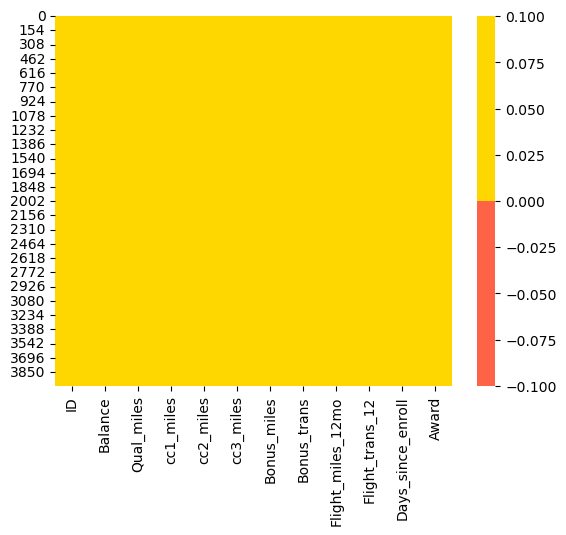

In [75]:
colours = ['#FF6347','#FFD700' ] 
pal = sns.color_palette(colours)
sns.heatmap(airlines.isnull(), cmap=pal)
plt.show()

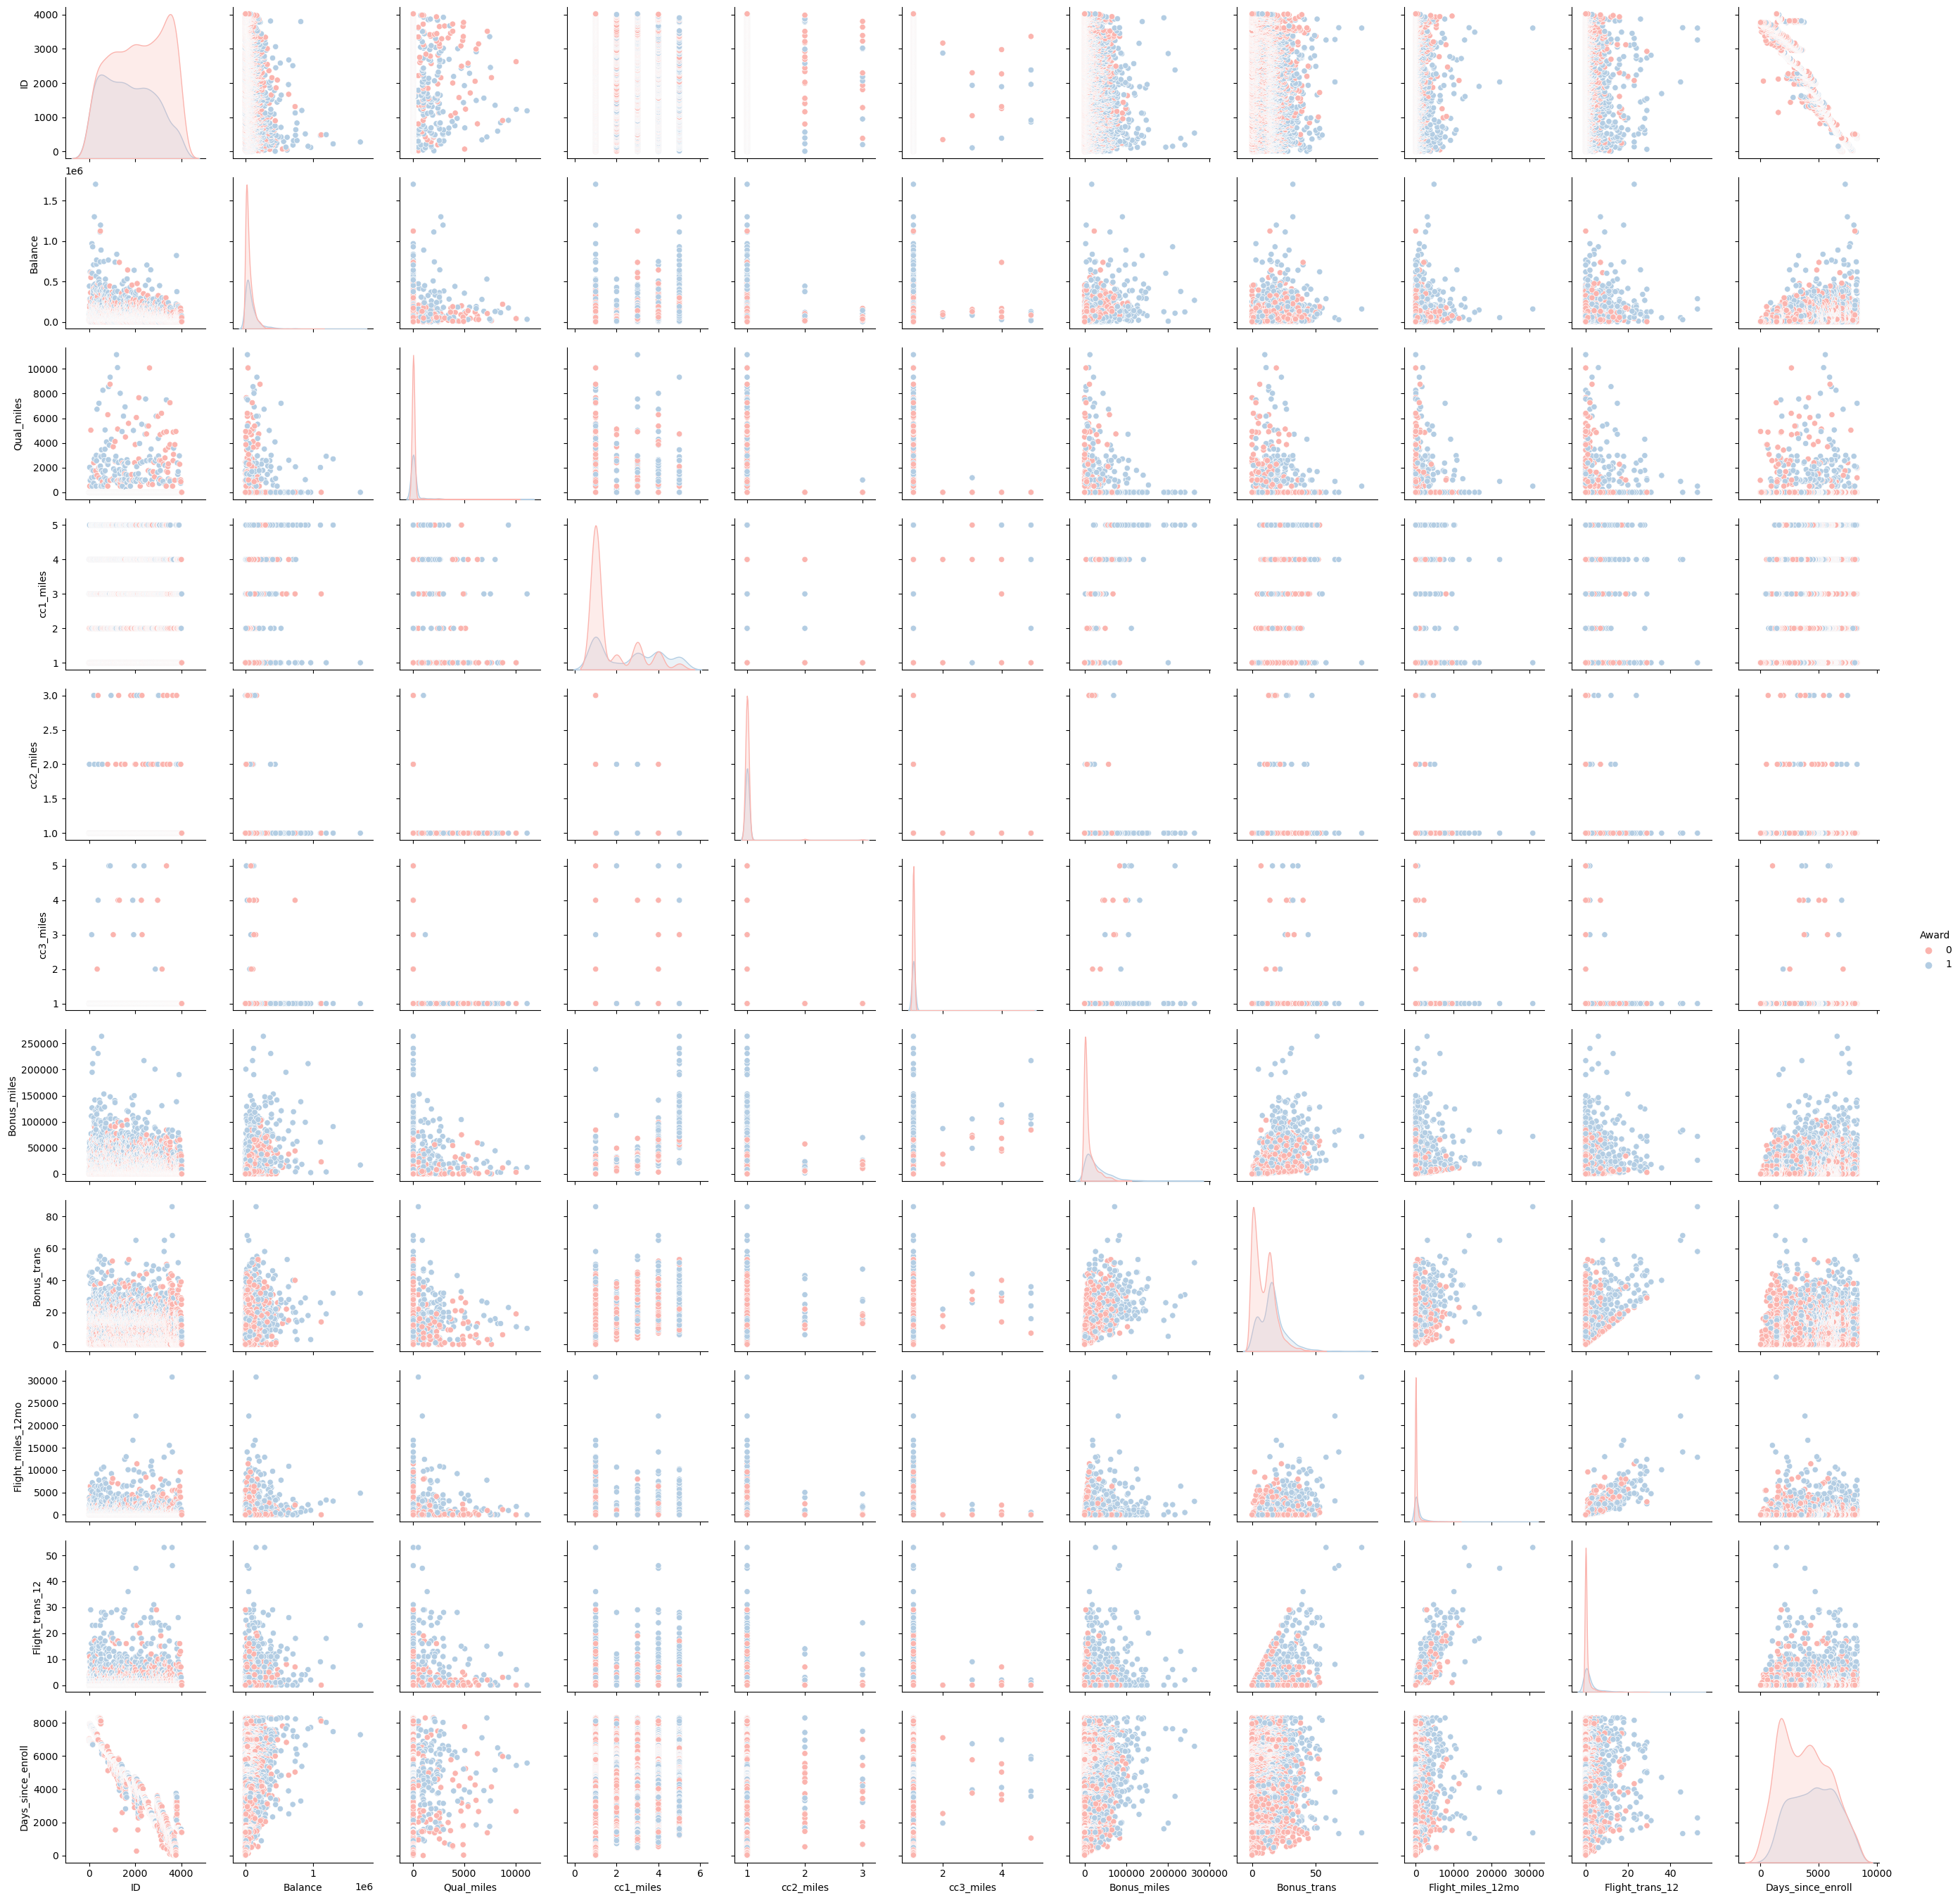

In [76]:
sns.pairplot(airlines,palette='Pastel1', hue='Award')
plt.show()

In [77]:
airlines.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


[]

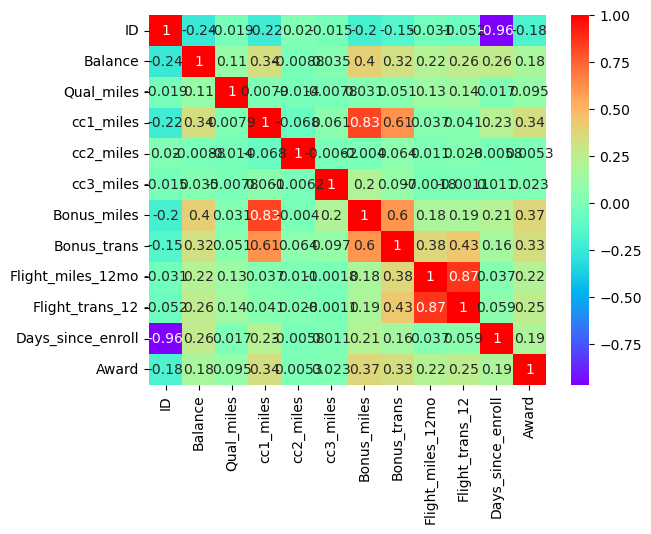

In [78]:
sns.heatmap(airlines.corr(),cmap='rainbow',annot=True)
plt.plot()

In [79]:
airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


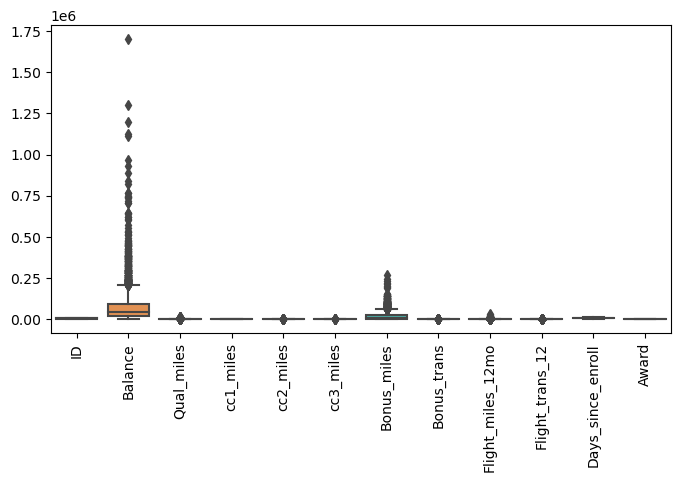

In [80]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = airlines)
plt.xticks(rotation=90)
plt.show()

### Model Diagnostics

### Influencer/Outliers

In [81]:
#Apply dimensionality reduction techniques like PCA or t-SNE to reduce the impact of outliers in high-dimensional data.

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler=StandardScaler()

In [84]:
scaled_df=scaler.fit_transform(airlines)
#scaled_df

In [85]:
#Build the model

In [86]:
from sklearn.decomposition import PCA

In [87]:
model=PCA(n_components=12)

In [88]:
pc_comps=model.fit_transform(scaled_df)
#pc_comps

In [89]:
var=model.explained_variance_ratio_
var

array([0.28746621, 0.15963342, 0.12889675, 0.08521741, 0.08175671,
       0.07987501, 0.06807031, 0.05428394, 0.03002889, 0.01155626,
       0.01033234, 0.00288277])

In [90]:
np.cumsum(var)

array([0.28746621, 0.44709963, 0.57599638, 0.66121379, 0.74297049,
       0.8228455 , 0.89091581, 0.94519974, 0.97522863, 0.98678489,
       0.99711723, 1.        ])

In [91]:
pc_comps[:,0:10]

array([[-0.78839653, -1.8984719 , -1.88107818, ..., -0.36986981,
         0.35307341,  0.06387762],
       [-0.77682058, -1.87357576, -1.85176215, ..., -0.46074797,
         0.28375487,  0.08266204],
       [-0.54452025, -1.87175172, -1.76980096, ..., -0.40298993,
         0.17035664,  0.20537254],
       ...,
       [-0.38986525,  0.97940991,  1.92634695, ...,  1.0659838 ,
         0.37414992, -0.30024963],
       [-2.19414709,  1.36929387,  0.49427246, ...,  0.41454788,
         0.42350903, -0.07628917],
       [-2.57976936,  1.06711174,  0.68845157, ...,  0.15599607,
         0.44024288, -0.0174402 ]])

# KMean Clustering

# Build the model

In [92]:
from sklearn.cluster import KMeans

In [93]:
kmodel=KMeans(n_clusters=4,random_state=42)

In [94]:
kmodel.fit(scaled_df)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [95]:
kmodel.labels_

array([2, 2, 2, ..., 0, 0, 0])

### Hyperparameter Tuning

In [96]:
wcss_al=[]
for i in range(1,12):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(airlines)
    wcss_al.append(model.inertia_)
wcss_al

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[42967206847420.62,
 20828852094270.258,
 11797435958338.05,
 7554668286111.583,
 5729432723759.61,
 4546507928780.678,
 3702347057272.3237,
 3277003112270.4287,
 2905263004638.985,
 2638311521290.089,
 2388892972812.0615]

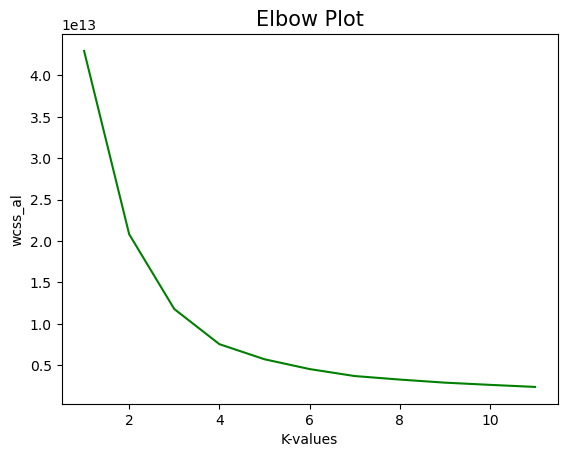

In [97]:
plt.plot(range(1,12),wcss_al,color='green')
plt.title("Elbow Plot",fontsize=15)
plt.xlabel('K-values')
plt.ylabel('wcss_al')
plt.show()

In [98]:
#Buid the final model with k=4

In [99]:
model_fin=KMeans(n_clusters=4,random_state=42)

In [100]:
model_fin.fit(scaled_df)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [101]:
model_fin.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [102]:
airlines['KMeans_labels']=model_fin.labels_

In [103]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [104]:
X1=airlines.iloc[:,:12]
y3=airlines.iloc[:,12]

In [105]:
from sklearn.manifold import TSNE

In [106]:
model1=TSNE(n_components=2)

In [107]:
tsne_comps1=model1.fit_transform(X1)

In [108]:
tsne_comps1

array([[-40.817627 , -25.736273 ],
       [-53.27203  , -10.665486 ],
       [ -3.0904028, -40.496098 ],
       ...,
       [ 26.290707 ,  -9.280938 ],
       [ 14.130757 , -39.12711  ],
       [-40.535812 ,  41.968082 ]], dtype=float32)

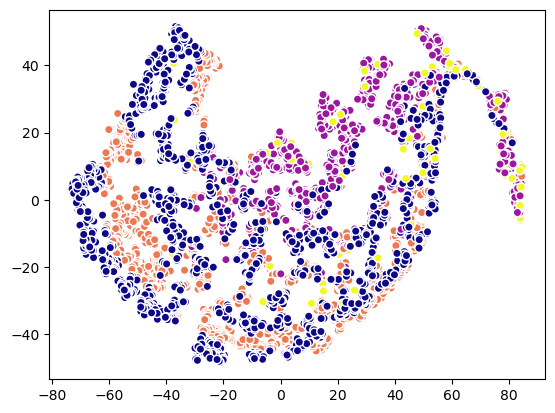

In [109]:
plt.scatter(tsne_comps1[:,0],tsne_comps1[:,1],c=y3,cmap='plasma',edgecolor='white')
plt.show()

In [110]:
KM_grp=airlines.groupby(['KMeans_labels'])

In [111]:
for x,y in KM_grp:
    print(x)

0
1
2
3


C:\Users\sreen\AppData\Local\Temp\ipykernel_11348\1257729546.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for x,y in KM_grp:


In [112]:
for x,y in KM_grp:
    print(y)
    print(70*'-')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1129  1141     1625           0          1          1          1         1375   
1424  1438    22093           0          3          1          1        14857   
1950  1967    15676           0          1          1          1            0   
1951  1968    55064           0          2          1          1         8041   
1952  1969    40675           0          1          1          1         1413   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

C:\Users\sreen\AppData\Local\Temp\ipykernel_11348\2293243644.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for x,y in KM_grp:


In [113]:
KM_grp.agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
KMeans_labels,,,,,,,,,,,,
0,3133.055231,39898.197531,106.287199,1.388564,1.016894,1.000000,6271.906433,7.831709,201.923977,0.600390,2155.511371,0.211826
1,1532.492552,127734.216485,160.202582,3.959285,1.001986,1.047666,45887.323734,19.507448,371.256207,1.117180,4977.380338,0.692155
2,1094.120278,56985.831149,96.370085,1.363917,1.018504,1.000771,5886.720894,7.996916,227.814187,0.703932,5713.395528,0.254433
3,1751.262821,194803.871795,810.397436,2.198718,1.038462,1.000000,32475.410256,27.737179,5510.717949,16.224359,4681.352564,0.820513


### HAC CLustering

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
mn_alscaler=MinMaxScaler()

In [116]:
scaledal_mn=mn_alscaler.fit_transform(airlines)
scaledal_mn

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 6.66666667e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 6.66666667e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 6.66666667e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 0.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 0.00000000e+00]])

### Build the HAC model

In [117]:
from sklearn.cluster import AgglomerativeClustering

In [118]:
model_AC=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [119]:
airlines.drop('KMeans_labels',axis=1,inplace=True)

In [120]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [121]:
model_AC.fit(scaledal_mn)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [122]:
model_AC.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [123]:
airlines['HAC_labels']=model_AC.labels_
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HAC_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [124]:
y4=airlines.iloc[:,12]

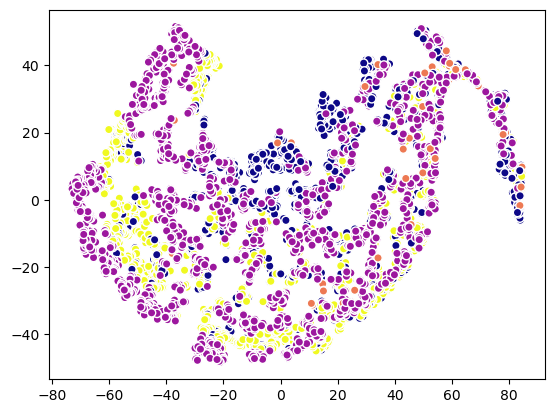

In [125]:
plt.scatter(tsne_comps1[:,0],tsne_comps1[:,1],c=y4,cmap='plasma',edgecolor='white')
plt.show()

In [126]:
HAC_grp=airlines.groupby('HAC_labels')

In [127]:
for x,y in HAC_grp:
    print(x)

0
1
2
3


In [128]:
for x,y in HAC_grp:
    print(y)
    print(75*'-')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
11      12    96522           0          5          1          1        61105   
...    ...      ...         ...        ...        ...        ...          ...   
3855  3878   190730           0          5          1          1        78916   
3881  3904    32424           0          4          1          1        39635   
3883  3906   126167           0          5          1          1       190160   
3908  3931    57642           0          4          1          1        52176   
3930  3953    40424           0          4          1          1        44110   

      Bonus_trans  Flight_m

#### Plot the dendogram

In [129]:
from scipy.cluster import hierarchy

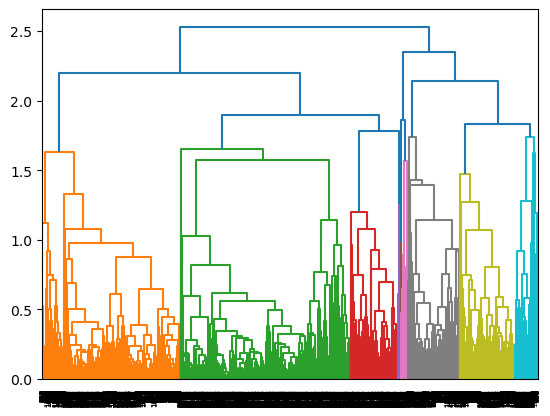

<Figure size 2000x1600 with 0 Axes>

In [130]:
hir=hierarchy.linkage(scaledal_mn,method='complete')
den=hierarchy.dendrogram(hir)
plt.figure(figsize=(20,16))
plt.show()

### Performing DBSCAN method

In [131]:
from sklearn.cluster import DBSCAN

In [132]:
model_DB=DBSCAN(eps=0.5,min_samples=5)

In [133]:
model_DB.fit(scaledal_mn)

DBSCAN()

In [134]:
model_DB.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [135]:
airlines.drop('HAC_labels',axis=1,inplace=True)

In [136]:
airlines['DBSCAN_labels']=model_DB.labels_

In [137]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [138]:
y5=airlines.iloc[:,12]

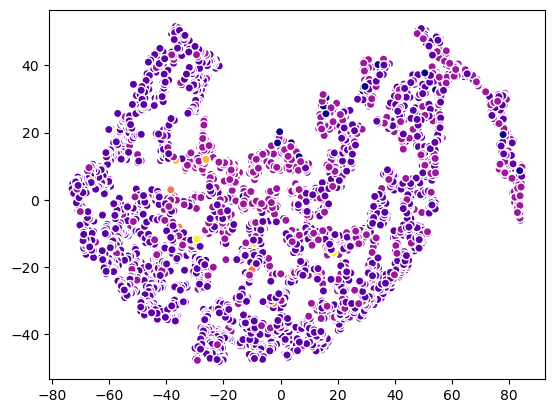

In [139]:
plt.scatter(tsne_comps1[:,0],tsne_comps1[:,1],c=y5,cmap='plasma',edgecolor='white')
plt.show()

In [140]:
DBS_grp=airlines.groupby('DBSCAN_labels')

In [141]:
for x,y in DBS_grp:
    print(x)

-1
0
1
2
3
4
5


In [142]:
for x,y in DBS_grp:
    print(y)
    print(75*'*')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
106    109    96627        1182          1          1          3        49059   
112    115   124198           0          5          1          1        66330   
198    202     8669           0          1          3          1        11397   
226    230   117329           0          1          2          1         6448   
243    247   118934           0          5          1          1        66222   
275    279  1704838           0          1          1          1        17108   
381    386   167670           0          1          3          1        15907   
384    389    28193           0          5          1          4       103456   
392    398    11189           0          1          2          1         9044   
561    568   380930           0          2          2          1        22485   
850    861    25629         

from the above methods of clustering and by comparing them in single table

In [143]:
airlines1=airlines

In [144]:
airlines1['KMeans_labels']=model_fin.labels_
airlines1['HAC_labels']=model_AC.labels_
airlines1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels,KMeans_labels,HAC_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,1


KMeans- From the above table , it is clear that it has k clusters=4 .... and based on that it has been divide into 4 clusters.

Hirearchichal- Similar to KMeans it has been divided into 4 clusters as 0,1, and 2,3 .... but cluster points are different compared to KMeans.

DBSCAN- Based on the data , its eps and min_samples , model has predicted points on basis of -1(noise points),0(core points),1(border points) and 2,3,4&5 (others)